### Project Introduction
Beta Bank customers are leaving; chipping away monthly. The bankers want to save the existing customers rather than attract new ones. I will predict whether a customer will leave the bank soon. I have data on clients’ past behavior and termination of contracts with the bank to use.
I will build a model with F1 score, of at least 0.59 and check the F1 for the test set.
Also, I will measure the AUC-ROC metric and compare it with the F1. -by Brandi Booth

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from joblib import dump
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [6]:
mean = df['Tenure'].mean()

In [7]:
df['Tenure'] = df['Tenure'].replace(np.NaN, mean)

In [8]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [11]:
df = pd.get_dummies(df, drop_first=True)


In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.00000,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.00000,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.00000,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.00000,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.00000,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.00000,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.00000,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.00000,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.00000,75075.31,2,1,0,92888.52,1,1,0,1


In [13]:
df.shape

(10000, 12)

0    7963
1    2037
Name: Exited, dtype: int64

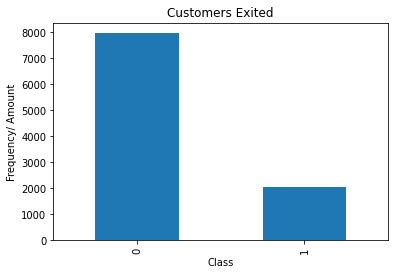

In [14]:
pd.value_counts(df['Exited']).plot.bar()
plt.title('Customers Exited')
plt.xlabel('Class')
plt.ylabel('Frequency/ Amount')
df['Exited'].value_counts()

1 is exited customers and 0 are customer not exited.  The amount of customers exited is 2037, while non-exited customers is 7963 customers.  We have imbalanced data.

In [15]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [16]:
display(X.shape)
y.shape

(10000, 11)

(10000,)

In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)


(7000, 11)
(1800, 11)
(1200, 11)


In [18]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.00000,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.00000,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8.00000,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1.00000,0.00,2,0,0,93826.63,0,0,0
4,850,43,2.00000,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.00000,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10.00000,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7.00000,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3.00000,75075.31,2,1,0,92888.52,1,0,1


In [19]:
normalize = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']
scaler = StandardScaler()
scaler.fit(X_train[normalize])
X_train.loc[:,normalize] = scaler.transform(X_train[normalize])
X_valid.loc[:,normalize] = scaler.transform(X_valid[normalize])
X_test.loc[:,normalize] = scaler.transform(X_test[normalize])
X_train.shape

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

(7000, 11)

In [20]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.00000,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.00000,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8.00000,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1.00000,0.00,2,0,0,93826.63,0,0,0
4,850,43,2.00000,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.00000,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10.00000,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7.00000,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3.00000,75075.31,2,1,0,92888.52,1,0,1


LogisticRegression Model

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

In [22]:
score_train = model1.score(X_train, y_train)
score_valid = model1.score(X_valid, y_valid)
print(f'Accuracy score for training set: {score_train}')
print(f'Accuracy score for validation set: {score_valid}')


print('AUC:', roc_auc_score(y_valid, model1.predict_proba(X_valid)[:,1]))

predicted_valid_mod1 = model1.predict(X_valid)
print('F1 score:', f1_score(y_valid, predicted_valid_mod1))

Accuracy score for training set: 0.81
Accuracy score for validation set: 0.8161111111111111
AUC: 0.7595141076321773
F1 score: 0.27571115973741794


<div class="alert alert-info">
    <h3>LogisticRegression Conclusion</h3>
        <p>The LogisticRegression model tested for 81.6% accuracy on our validation set, AUC is 76%, and an F1 score of .275, which signifies our precision and recall is unsatifactory.  We know our target is imbalanced and need to take into account for such before even building other models; as we know Random Forest and Decision Tree also do not perform well on imbalanced data sets. </p>
</div>


Now to balance the data and see how the model works.


In [23]:
#LogisticRegression with class weight
model1_bal = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
model1_bal.fit(X_train, y_train)

score_train1 = model1_bal.score(X_train, y_train)
score_valid1 = model1_bal.score(X_valid, y_valid)
print(f'Accuracy score for training set: {score_train1}')
print(f'Accuracy score for validation set: {score_valid1}')


print('AUC:', roc_auc_score(y_valid, model1_bal.predict_proba(X_valid)[:,1]))

predicted_valid = model1_bal.predict(X_valid)
print('F1 score:', f1_score(y_valid, predicted_valid))

Accuracy score for training set: 0.7135714285714285
Accuracy score for validation set: 0.6966666666666667
AUC: 0.7614348793483574
F1 score: 0.4583333333333333


In [24]:
#Upsampling

def upsample(features, target, repeat):
    features_zeros = X[y == 0]
    features_ones = X[y == 1]
    target_zeros = y[y == 0]
    target_ones = y[y == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=42
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    X_train, y_train, 10
)

model2 = LogisticRegression(random_state=42, solver='liblinear')
model2.fit(features_upsampled, target_upsampled)
predicted_valid0 = model2.predict(X_valid)
score_valid2 = model1_bal.score(X_valid, y_valid)

print(f'Accuracy score for validation set: {score_valid2}')
print('AUC:', roc_auc_score(y_valid, model2.predict_proba(X_valid)[:,1]))
print('F1:', f1_score(y_valid, predicted_valid0))


Accuracy score for validation set: 0.6966666666666667
AUC: 0.7248671990199399
F1: 0.4359673024523161


In [25]:
 #Downsampling
    
def downsample(features, target, fraction):
    features_zeros = X[y == 0]
    features_ones = X[y == 1]
    target_zeros = y[y == 0]
    target_ones = y[y == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=42)]
        + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=42)]
        + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=42)

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    X_train, y_train, 0.1)

model_down = LogisticRegression(random_state=42, solver='liblinear')
model_down.fit(features_downsampled, target_downsampled)

predicted_valid1 = model_down.predict(X_valid)
score_valid2 = model_down.score(X_valid, y_valid)

print(f'Accuracy score for validation set: {score_valid2}')
print('AUC:', roc_auc_score(y_valid, model_down.predict_proba(X_valid)[:,1]))
print('F1:', f1_score(y_valid, predicted_valid1))


Accuracy score for validation set: 0.6577777777777778
AUC: 0.7255547825593117
F1: 0.4369287020109689


In [26]:
#DecisionTreeClassifier

best_model = None
best_result = 0
for depth in range(1, 6):
	model_d_tree = DecisionTreeClassifier(random_state=42, max_depth=depth, class_weight='balanced')
	model_d_tree.fit(X_train, y_train)
	predictions_valid_d_tree = model_d_tree.predict(X_valid) 
	result = accuracy_score(y_valid, predictions_valid_d_tree)
	if result > best_result:
		best_model = model_d_tree
		best_result = result
        
print("Accuracy of the best model:", best_result)
print('AUC:', roc_auc_score(y_valid, model_d_tree.predict_proba(X_valid)[:,1]))
print('F1:', f1_score(y_valid, predictions_valid_d_tree))


Accuracy of the best model: 0.7511111111111111
AUC: 0.8237707162429948
F1: 0.5098425196850394


Result: For DecisionTreeClassifier, I added the `class_weight=balanced` and it only slightly increased the F1 from .496 to .509.  Are results are increasing but still not quiet approvable yet.  <br><b>Let's try Random Forest.

In [27]:
# Test RandomForestClassifier for best n_estimators
best_score = 0
best_est = 0
for est in range(1,150): # choose hyperparameter range
    model4 = RandomForestClassifier(random_state=42, n_estimators=est, max_depth= 10, class_weight='balanced') # set number of trees
    model4.fit(X_train, y_train)
    score = model4.score(X_valid, y_valid) # calculate accuracy score on validation set
    if score > best_score:
        best_score = score
        best_est = est

print("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))



Accuracy of the best model on the validation set (n_estimators = 40): 0.8477777777777777


In [28]:
#RandomForestClassifier with best model estimators

model4 = RandomForestClassifier(random_state=42, n_estimators=40, max_depth=10, class_weight='balanced') # set number of trees
model4.fit(X_train, y_train)
predictions_valid4 = model4.predict(X_valid) 
score_valid4 = accuracy_score(y_valid, predictions_valid4)

        
print(f'Accuracy score for validation set: {score_valid4}')
print('AUC:', roc_auc_score(y_valid, model4.predict_proba(X_valid)[:,1]))
print('F1:', f1_score(y_valid, predictions_valid4))


Accuracy score for validation set: 0.8477777777777777
AUC: 0.8566357896359458
F1: 0.6028985507246377


<div class="alert alert-info">
    <h3>Conclusion:</h3>
        <p> RandomForestClassifier produces the best results.  I also added the `class_weight=balanced` parameter. We get a f1 score of 0.602 and the n_estimators we need is 40, with a max_depth of 10. Finally we achieved an acceptable number that gives us enough confidence to take our model to the testing data. The F1 score checks out to be the highest using this model with such parameters. </p>
</div>

<div class="alert alert-info">
    <h2>Final Model</h2>
        <p></p>
</div>


In [29]:
#Final model ON TEST SET
final_model = RandomForestClassifier(random_state=42, n_estimators=40, max_depth=10, class_weight='balanced')
final_model.fit(X_train, y_train)
predict_test = final_model.predict(X_test)
score_valid_test = accuracy_score(y_test, predict_test)

        
print(f'Accuracy score for validation set: {score_valid_test}')
print('AUC:', roc_auc_score(y_test, final_model.predict_proba(X_test)[:,1]))
print('F1:', f1_score(y_test, predict_test))


Accuracy score for validation set: 0.8341666666666666
AUC: 0.8658912192904572
F1: 0.6209523809523809



<div class=>
    <h3>Conclusion</h3>
        <p>Final test result, came out as the highest model yet for F1; F1 score is .62; An AUC of .865; and Accuracy of .834.</b>  Our test set performed above what is required and what was seen in the training and validation models for the F1 score.  The balance of our data, and expansions of hyperparameters helped to meet the expectations of the assignments.  <br> Now let's look at the visuals. </p>
</div>

<div class="alert alert-info">
    <h2>Examine AUC-ROC Values, F1 score is .62</h2>
        <p></p>
</div>

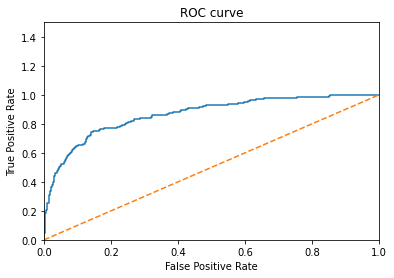

In [30]:
probabilities_valid = final_model.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.5])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

<div class=>
    <h2>Project Conclusion </h2>
        <p>The best model for predicting whether a customer will leave the bank soon using the data provided is; Random Forest Classifier. <br>
The targeted data was imbalanced; which would have created a learning curve for our training models; so using parameters such as class_weight parameter set to ' balanced ' helped to solve equations of mean and deviation tasks for the learning models. Setting it to 'balanced' is very important otherwise the performance expectations are not met.

The hyperparameters max_depth is set to 10 and n_estimators is set to 40, and a random_state of 42; which is based off of the theory behind the name change of the program of Practicum to Triple10, via my own research! 

For the test dataset, the F1 score is 0.62 and An AUC of .865; and Accuracy of .834. These metrics signify good quality and meet the expectations of the assignment.</p>
</div>
